# Implementing CNN in Tensorflow

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization
import tensorflow as tf

from tensorflow.keras.datasets import mnist

from keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #Load the MNIST dataset

11490434/11490434 [==============================] - 0s 0us/step


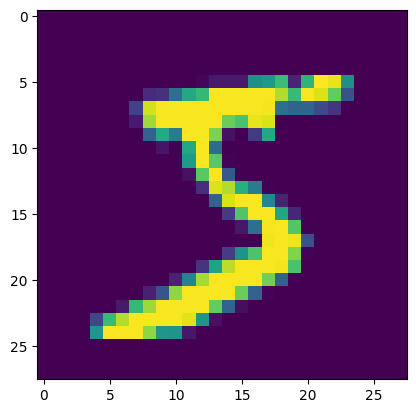

In [4]:
plt.imshow(train_images[0])

In [5]:
# Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
'''Reshape image in 3 dimensions
height: 28px
width: 28px
channel: 1 (grayscale)
'''
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [7]:
#One hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#eg: 3 = [0,0,0,1,0,0,0,0,0]
print(train_labels.shape)

(60000, 10)


In [8]:
mean = np.mean(train_images)
std = np.std(train_images)

'''transforms the data to have a mean of 0 and a standard deviation of 1.
This process is often necessary because it ensures that all features have the same scale,
which can be important for some algorithms to perform effectively.'''
def standardize(x): #z-score normalization
  return (x-mean)/std

# Defining the model

In [9]:
model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [10]:
epochs = 10
batch_size = 128
train_steps = train_images.shape[0] // batch_size
valid_steps = test_images.shape[0] // batch_size

#EarlyStopping prevents overfitting by stopping training when the model's performance on the validation set begins to degrade
es = keras.callbacks.EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # maximizing validation accuracy in our case
        restore_best_weights=True,
     )

#ReduceLROnPlateau adjusts the learning rate when the model's performance plateaus, allowing the model to converge more effectively.
rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [11]:
history = model.fit(train_images, train_labels, batch_size=batch_size, validation_split=0.2, epochs=10, callbacks=[es, rp])

Epoch 1/10
375/375 [==============================] - 19s 15ms/step - loss: 0.0879 - accuracy: 0.9728 - val_loss: 2.3560 - val_accuracy: 0.2984 - lr: 0.0010
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0417 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.0720 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.0981 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 5/10
371/375 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9949
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
375/375 [==============================] - 5s 14ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0612 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 6/10
375/375 [==============================] - 5s 

# Evaluate the model

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0184 - accuracy: 0.9950


In [13]:
print(f"Test accuracy {test_acc}\nTest loss {test_loss}")

Test accuracy 0.9950000047683716
Test loss 0.018386192619800568


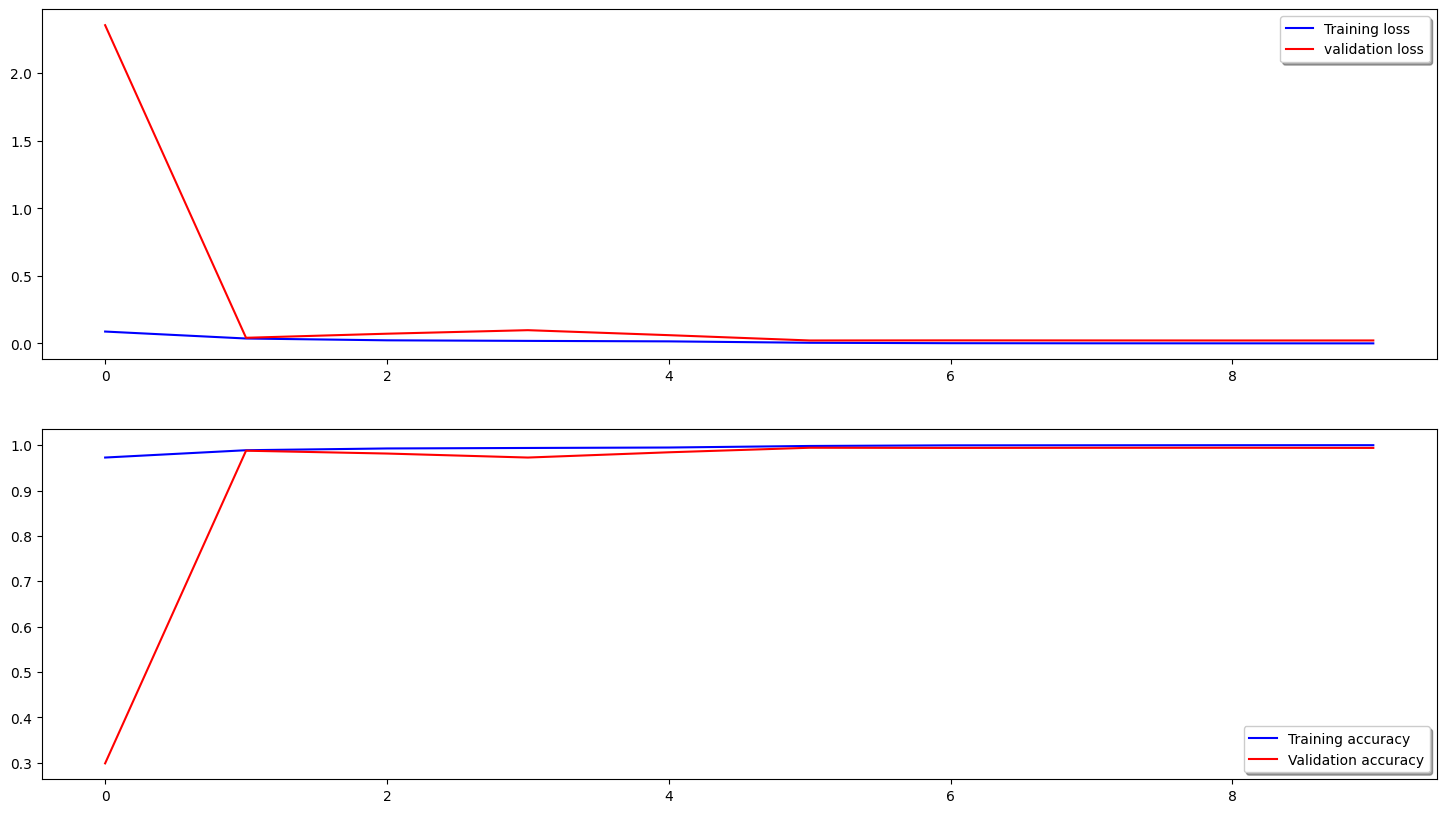

In [14]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)